<a href="https://colab.research.google.com/github/guillermohenrion/chaos/blob/master/Chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Un sistema dinámico determinista es sensible a las condiciones inciales, con lo cual pequeñas perturbaciones en la entrada pueden llevar a comportamientos totalmente distintos.

Se muestra a continuación, en un ejemplo programado en python, como ese comportamoiento caótico puede verse aún en fucniones en apariencia sencilla como una función logística.

<https://ipython-books.github.io/121-plotting-the-bifurcation-diagram-of-a-chaotic-dynamical-system/>
<fake@example.com>

<https://books.google.com.ar/books/about/Chaos.html?id=48YHnbHGZAgC&redir_esc=y>


## Importramos librerías

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Definimos la función logística por:

$f_r(x)=rx (1-x)$

In [0]:
def logistic(r, x):
    return r * x * (1 - x)

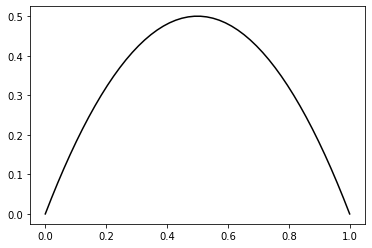

In [3]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

Nuestro sistema dinámico discreto se define por la aplicación recursiva de la función logística y la simulación de algunas iteraciones con dos r distintos

$x^{(r)}_{n+1}=f(x^{(r)}_{n})=rx^{(r)}_{n}(1-x^{(r)}_{n})$


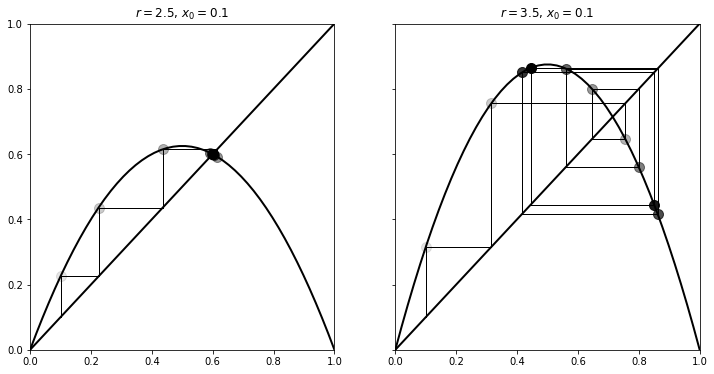

In [4]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

En el panel izquierdo, podemos ver que nuestro sistema converge al punto de intersección de la curva y la línea diagonal (punto fijo). Sin embargo, en el panel derecho, usando un valor diferente para r, observamos un comportamiento aparentemente caótico del sistema.

Ahora, simulamos este sistema para 10000 valores de r linealmente espaciados entre 2.5 y 4, y vectorizamos la simulación con NumPy considerando un vector de sistemas independientes (un sistema dinámico por valor de parámetro):

In [0]:
n = 10000
r = np.linspace(2.5, 4.0, n)

In [0]:
iterations = 1000
last = 100

In [0]:
x = 1e-5 * np.ones(n)

In [0]:
lyapunov = np.zeros(n)

Simulamos el sistema y trazamos el diagrama de bifurcación. La simulación solo implica la evaluación iterativa de la función logística () en nuestro vector x. Luego, para mostrar el diagrama de bifurcación, dibujamos un píxel por punto <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msubsup>
    <mi>x</mi>
    <mi>n</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mo stretchy="false">(</mo>
      <mi>r</mi>
      <mo stretchy="false">)</mo>
    </mrow>
  </msubsup>
</math> durante las últimas 100 iteraciones

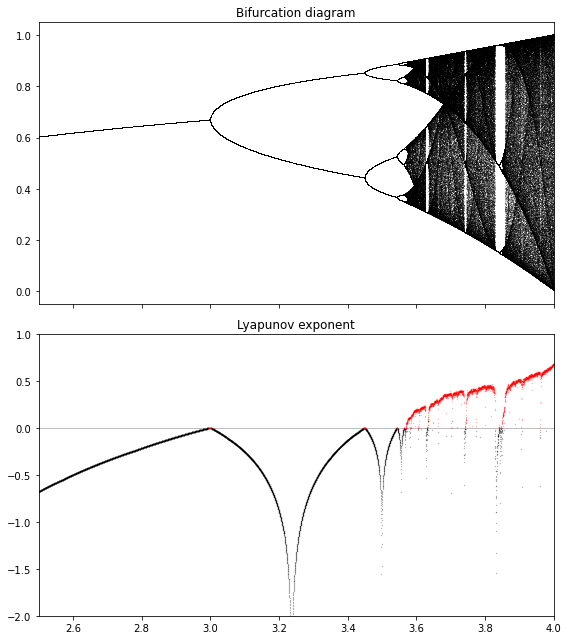

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

El diagrama de bifurcación resalta la existencia de un punto fijo para r <3, luego dos y cuatro equilibrios, y un comportamiento caótico cuando r pertenece a ciertas áreas del espacio de parámetros.

Observamos una propiedad importante del exponente de Lyapunov: es positivo cuando el sistema es caótico (en rojo aquí).

Donde aproximamos el exponente de Lyapunov como:

$\lambda(r)=\lim\limits_{n\rightarrow\infty}\frac{1}{n}
\sum_{i=0}^{n-1}\log\begin{vmatrix}\frac{d_{f_r}}{d_x}(x^{(r)}_i)\end{vmatrix}$
